### Two Way | Two Factor ANOVA 

There are chances when we want to study the effect of more than one variable on a dependent variable. We must use thw multi factor ANOVA.  for two such factors we use Two Factor ANOVA

Two WAY ANOVA is a factorial experiment, which means this experiment allow us to study the effect of all possible combinations of factors on a dependent construct. There can be two type of factorial experiment with more than one factor. One in which there is interaction and another with no interaction.

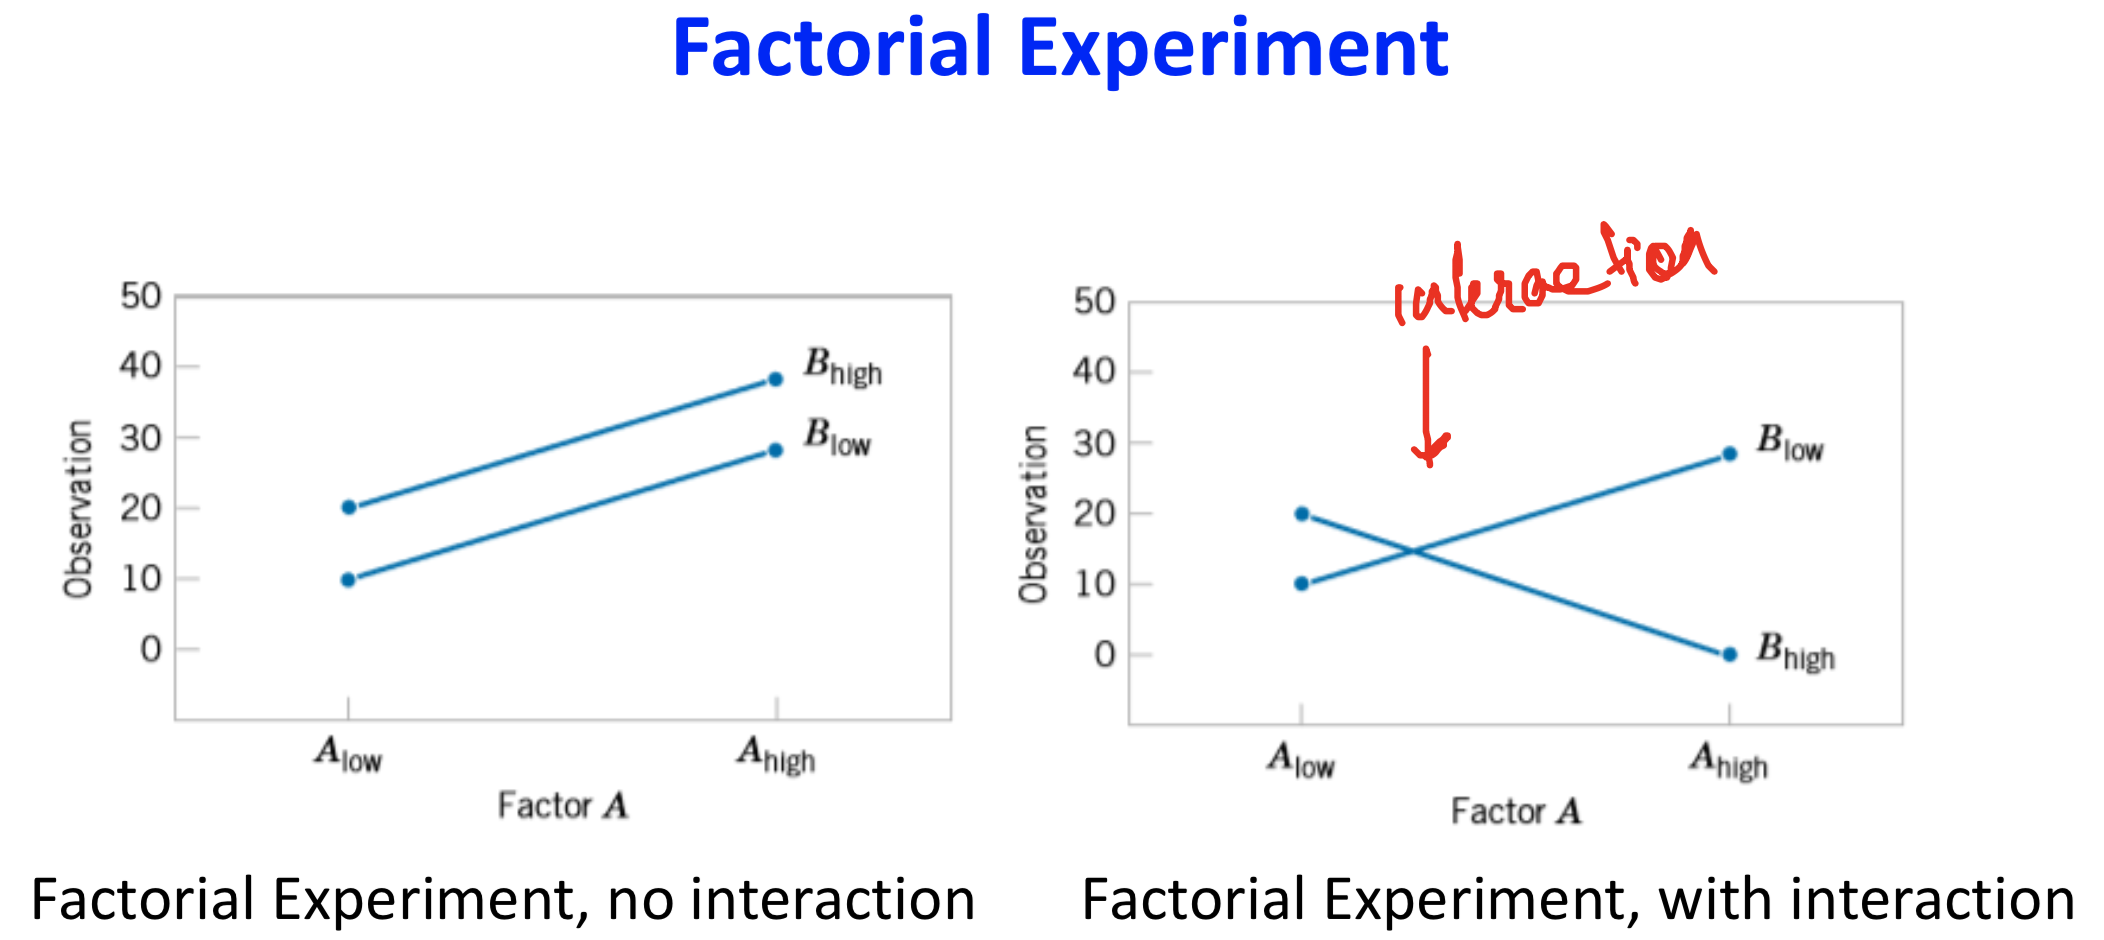

In [83]:
from IPython.display import Image
Image('FactorialExperiment.png', width=600)

E.g. Consider an example where we need to study the affect of different course programs and undergraduate course on the CAT score of an applicant. There are 3 different programs of courses and 3 different undergraduate coursses from which these observations are taken. 

#### Factor 1 : 

There can be 3 different programs of course.
* Three Hour Review
* One day program 
* 10 Week Course

####  Factor 2 :

There are 3 different educational background (Undergraduate course)
* Business school (BBA,Bcom Etc.)
* Engineering 
* Arts and Science

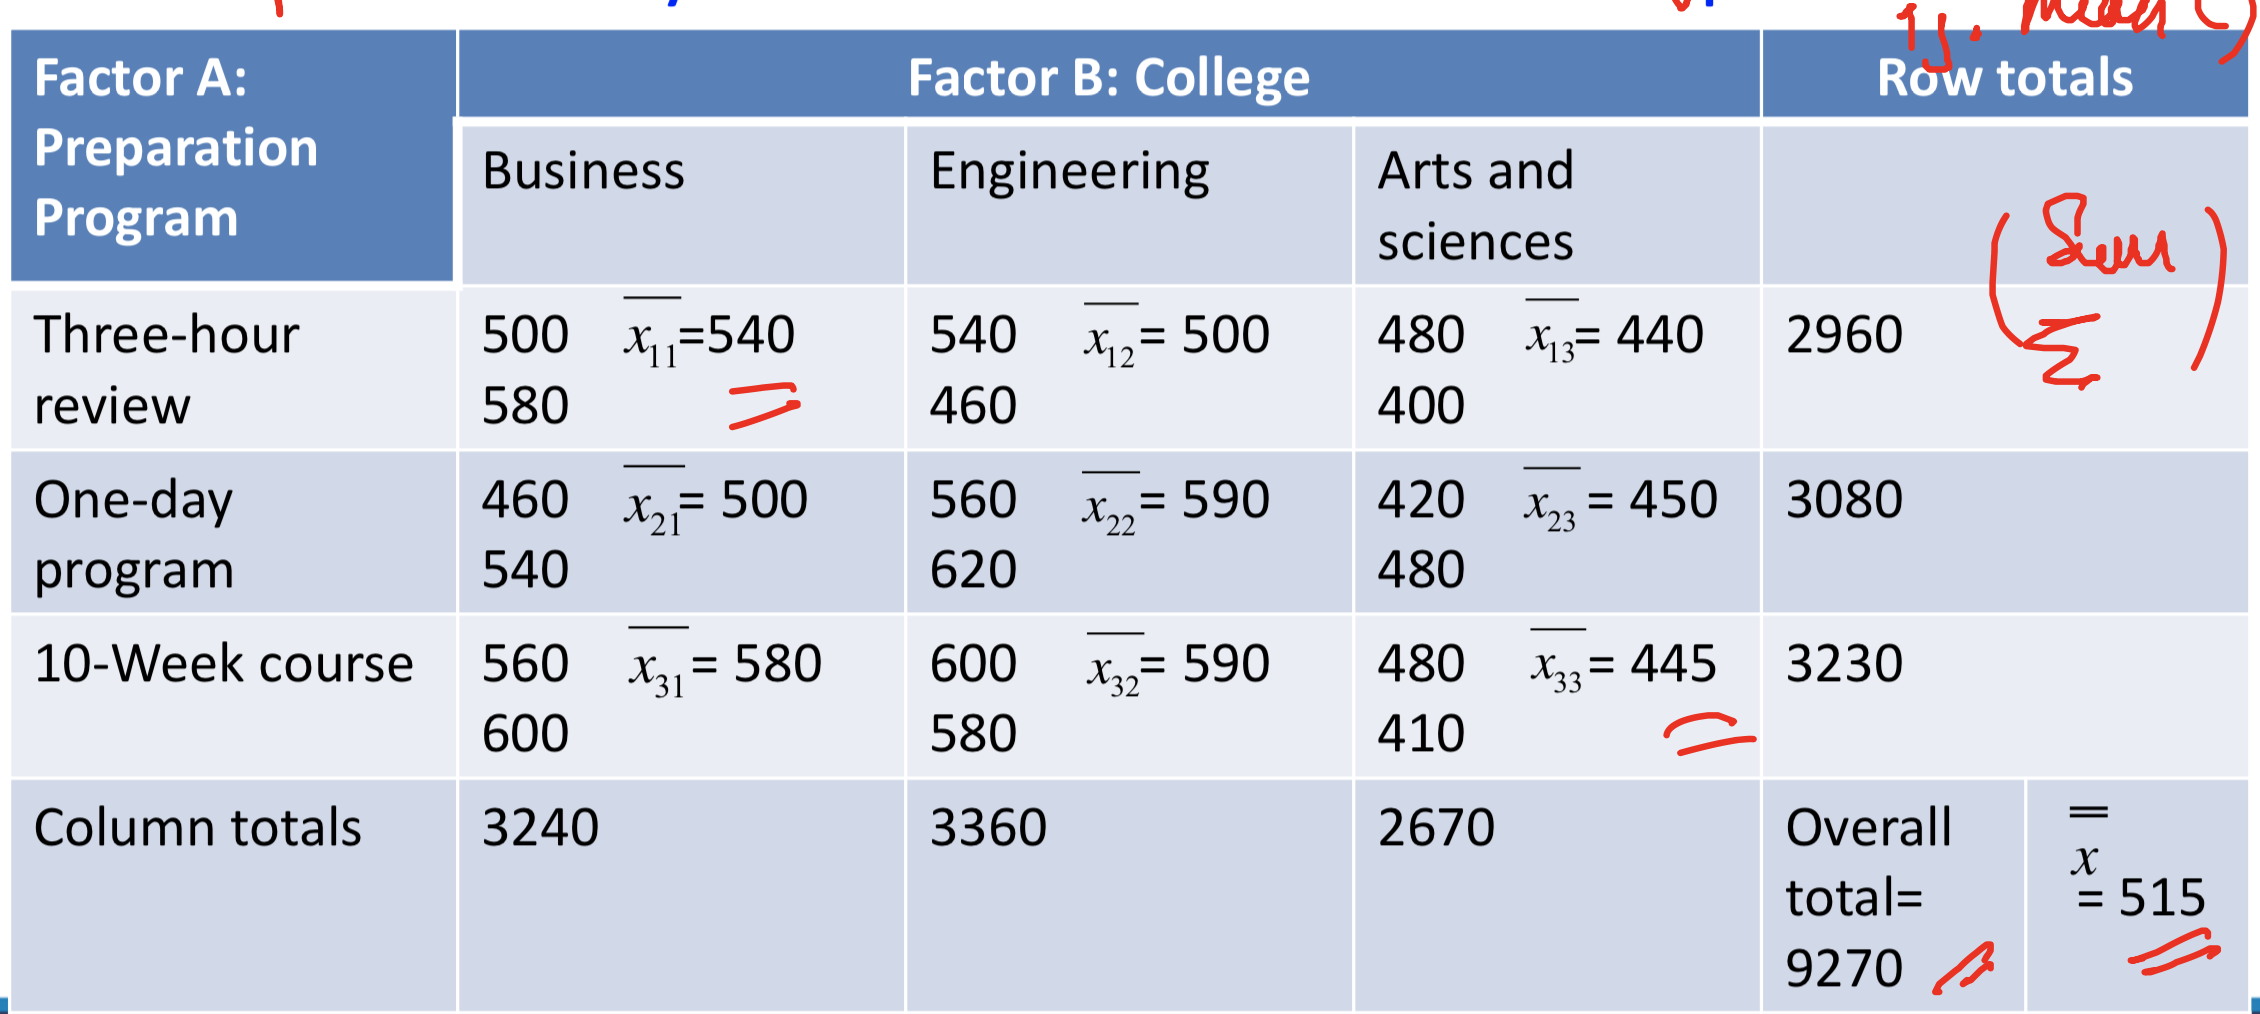

In [84]:
Image('twofactortable.png', width=700)

##### There are total 3x3 = 9 possibilities with 2 replication for each possibility. ie we have 18 observations

In this experiment there are 3 effects on the CAT SCORES, 1. Main effect of A, 2. MAin Effect of B. 3. Interaction of both A and B 

In [85]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats 

In [86]:
CAT_data = pd.read_excel('twoway.xlsx')
CAT_data

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience
5,400,three_hr,Artsandscience
6,460,One-day,Business
7,540,One-day,Business
8,560,One-day,Engineering
9,620,One-day,Engineering


In [87]:
# Factor A Means : 

# All Colleces Program 1 : Row1
x1mean = (540+500+440)/3

# All Colleges Program 2 : Row 2 
x2mean = (500+590+450)/3

# All Collefes Program 3 : Row 3
x3mean = (580+590+445)/3

xmean = [x1mean,x2mean,x3mean]
xmean

[493.3333333333333, 513.3333333333334, 538.3333333333334]

In [88]:
# Factor B Means : 

# All Programs Business  College : Column 1  
y1mean = (540+500+580)/3

# All Programs Engineering  College : Column 2
y2mean = (500+590+590)/3

# All Programs Arts Science College : Column 3  
y3mean = (440+450+445)/3

ymean = [y1mean,y2mean,y3mean]
ymean

[540.0, 560.0, 445.0]

In [89]:
# Overall mean 
xbb = CAT_data['Value'].mean()
xbb

515.0

In [90]:
# Total Sum of Squares
SST=0
for each in CAT_data['Value']:
    SST = SST + (each - xbb)**2
SST

82450.0

In [91]:
def SSX(k,replication,listofmean,overallmean):
    SSX=0
    for each in listofmean:
        SSX = SSX + k*replication*((each-overallmean)**2)
    return SSX

In [92]:
# Calculating SSA : Sum of Squares due to Factor A i.e. different study programs
# number of levels 
SSA = SSX(k=3,replication=2,listofmean=xmean,overallmean=xbb)
SSA

6100.000000000015

In [93]:
# Calculating SSB : Sum of Squares due to Factor B, i.e. due to undergraduate college
SSB = SSX(k=3,replication=2,listofmean=ymean,overallmean=xbb)
SSB

45300.0

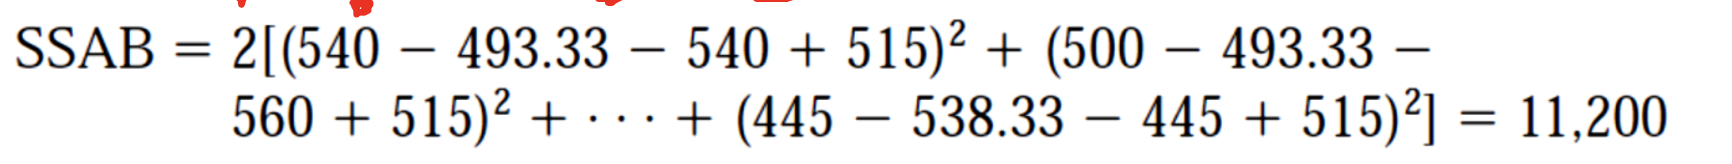

In [94]:
# Calculating SSB : Sum of Squares due to Interaction of both A and B.
SSAB = 11200 # For Illustration.
replication=2
Image('SSAB.png',width=500)

In [95]:
SSE = SST - SSA - SSB - SSAB
SSE

19849.999999999985

In [96]:
k = 3
MSA = SSA/(k-1)
MSB = SSB/(k-1)
MSAB  = SSAB/((k-1)*(k-1))

dfMSE = len(CAT_data) - (k-1) - (k-1) - ((k-1)*(k-1)) - 1
MSE = SSE / dfMSE

In [97]:
MSA,MSB,MSAB,MSE

(3050.0000000000073, 22650.0, 2800.0, 2205.555555555554)

In [98]:
F_A  = MSA/MSE
F_B = MSB / MSE
F_AB = MSAB / MSE

F_A,F_B,F_AB

(1.382871536523934, 10.269521410579353, 1.269521410579346)

In [105]:
# P Values Listed 
print(f" P val for A : {stats.f.pdf(F_A,2,9)}")
print(f" P val for B : {stats.f.pdf(F_B,2,9)}")
print(f" P val for AB Interaction : {stats.f.pdf(F_AB,4,9)}")

 P val for A : 0.22904842987142057
 P val for B : 0.0014492840104376923
 P val for AB Interaction : 0.33876075299456143


#### H_A : Accept H0
#### H_B : Reject H0
#### H_AB : Accept H0

#### only Factor B, i.e. undergraduate college has a significant effect, such that people from different colleges have significantly different mean 

## Python Code for Two Factor ANOVA

In [107]:
CAT_data.head()
# Data already in suitable format 

,Value,prep_pro,college
0,500,three_hr,Business
1,580,three_hr,Business
2,540,three_hr,Engineering
3,460,three_hr,Engineering
4,480,three_hr,Artsandscience


In [110]:
formula = 'Value ~ college + prep_pro + college:prep_pro'
model = ols(formula,CAT_data).fit()
aov_table = sm.stats.anova_lm(model,type=2)
print(aov_table)

                   df   sum_sq       mean_sq          F    PR(>F)
college           2.0  45300.0  22650.000000  10.269521  0.004757
prep_pro          2.0   6100.0   3050.000000   1.382872  0.299436
college:prep_pro  4.0  11200.0   2800.000000   1.269521  0.350328
Residual          9.0  19850.0   2205.555556        NaN       NaN
